In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("Heart.csv")

In [4]:
df.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [5]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
df.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [7]:
df.dtypes

Age            int64
Sex            int64
ChestPain     object
RestBP         int64
Chol           int64
Fbs            int64
RestECG        int64
MaxHR          int64
ExAng          int64
Oldpeak      float64
Slope          int64
Ca           float64
Thal          object
AHD           object
dtype: object

In [9]:
df.isna().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           4
Thal         2
AHD          0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        303 non-null    int64  
 1   Sex        303 non-null    int64  
 2   ChestPain  303 non-null    object 
 3   RestBP     303 non-null    int64  
 4   Chol       303 non-null    int64  
 5   Fbs        303 non-null    int64  
 6   RestECG    303 non-null    int64  
 7   MaxHR      303 non-null    int64  
 8   ExAng      303 non-null    int64  
 9   Oldpeak    303 non-null    float64
 10  Slope      303 non-null    int64  
 11  Ca         299 non-null    float64
 12  Thal       301 non-null    object 
 13  AHD        303 non-null    object 
dtypes: float64(2), int64(9), object(3)
memory usage: 33.3+ KB


In [13]:
df.describe()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000
mean,54.438944,0.679868,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241
std,9.038662,0.467299,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000


In [17]:
numeric_cols=df.select_dtypes(include='number').columns.tolist()
cat_cols=df.select_dtypes(include='object').columns.tolist()

In [18]:
from sklearn.impute import SimpleImputer

imputer_num=SimpleImputer(strategy='mean')
imputer_cat=SimpleImputer(strategy='most_frequent')


In [19]:
df[numeric_cols]=imputer_num.fit_transform(df[numeric_cols])
df[cat_cols]=imputer_cat.fit_transform(df[cat_cols])

In [21]:
df.isna().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           0
Thal         0
AHD          0
dtype: int64

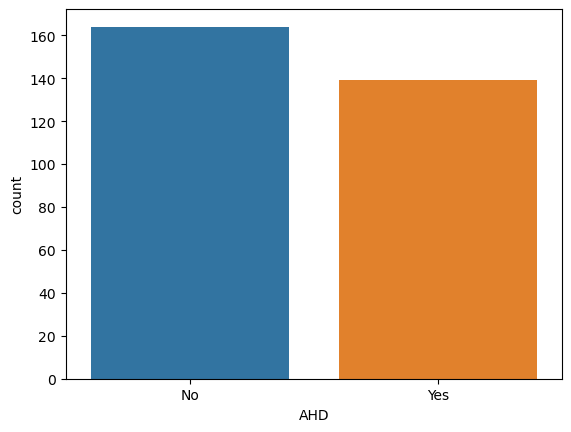

In [25]:
sns.countplot(data=df,x="AHD");

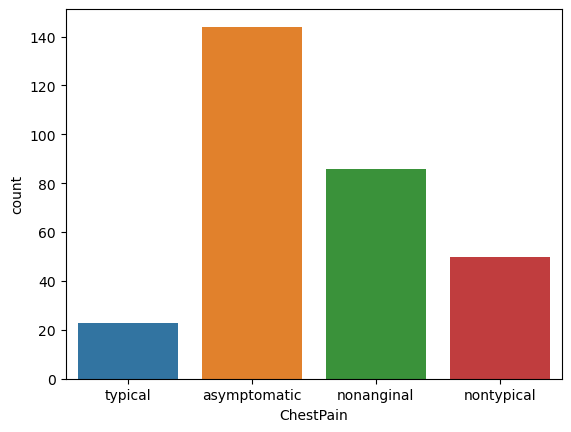

In [26]:
sns.countplot(data=df,x='ChestPain');

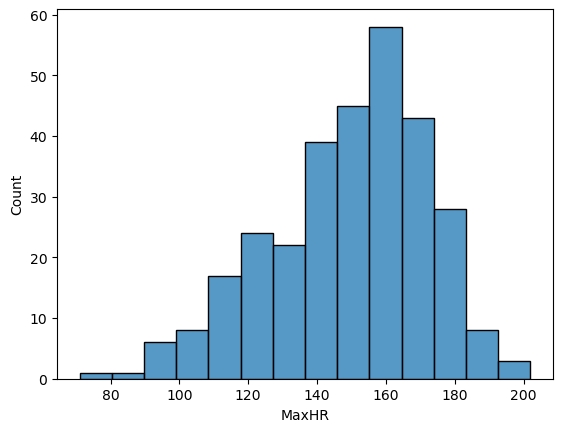

In [30]:
sns.histplot(data=df,x='MaxHR');

In [31]:
df.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63.0,1.0,typical,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,fixed,No
1,67.0,1.0,asymptomatic,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,normal,Yes
2,67.0,1.0,asymptomatic,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,reversable,Yes
3,37.0,1.0,nonanginal,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,normal,No
4,41.0,0.0,nontypical,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,normal,No


In [32]:
df.columns

Index(['Age', 'Sex', 'ChestPain', 'RestBP', 'Chol', 'Fbs', 'RestECG', 'MaxHR',
       'ExAng', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'AHD'],
      dtype='object')

In [33]:
select_cols=['Age', 'Sex', 'ChestPain', 'RestBP','MaxHR','Thal','AHD']

In [34]:
df2=df[select_cols].copy()

In [35]:
df2.head()

,Age,Sex,ChestPain,RestBP,MaxHR,Thal,AHD
0,63.0,1.0,typical,145.0,150.0,fixed,No
1,67.0,1.0,asymptomatic,160.0,108.0,normal,Yes
2,67.0,1.0,asymptomatic,120.0,129.0,reversable,Yes
3,37.0,1.0,nonanginal,130.0,187.0,normal,No
4,41.0,0.0,nontypical,130.0,172.0,normal,No


In [36]:
from sklearn.preprocessing import LabelEncoder

In [38]:
cat_cols=df2.select_dtypes(include='O').columns.tolist()
cat_cols

['ChestPain', 'Thal', 'AHD']

In [39]:

for col in cat_cols:
    encoder=LabelEncoder()
    df2[col]=encoder.fit_transform(df2[col])

In [40]:
df2.head()

,Age,Sex,ChestPain,RestBP,MaxHR,Thal,AHD
0,63.0,1.0,3,145.0,150.0,0,0
1,67.0,1.0,0,160.0,108.0,1,1
2,67.0,1.0,0,120.0,129.0,2,1
3,37.0,1.0,1,130.0,187.0,1,0
4,41.0,0.0,2,130.0,172.0,1,0


In [43]:
X=df2.drop('AHD',axis=1)
y=df2.AHD

In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
X_train.shape,y_train.shape


((242, 6), (242,))

In [46]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

In [48]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [50]:
model.score(X_test,y_test)

0.7049180327868853